**Group Members:**

 _ |Names | Student Number
---|---|---
1| Bongumusa Mavuso | 1682836
2| Thabo Rachidi | 1632496
3| Thobelani Makeleni | 1199116
4| Siyabonga Hlomuka | 1384685

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(style="white")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Attribute Information:

### Classes
19 Classes:
- diaporthe-stem-canker, 
- charcoal-rot, 
- rhizoctonia-root-rot,
- phytophthora-rot, 
- brown-stem-rot, 
- powdery-mildew,
- downy-mildew, 
- brown-spot, 
- bacterial-blight,
- bacterial-pustule, 
- purple-seed-stain, 
- anthracnose,
- phyllosticta-leaf-spot, 
- alternarialeaf-spot,
- frog-eye-leaf-spot, 
- diaporthe-pod-&-stem-blight,
- cyst-nematode, 
- 2-4-d-injury, 
- herbicide-injury.

### Features
1. date: april,may,june,july,august,september,october,?.
2. plant-stand: normal,lt-normal,?.
3. precip: lt-norm,norm,gt-norm,?.
4. temp: lt-norm,norm,gt-norm,?.
5. hail: yes,no,?.
6. crop-hist: diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?.
7. area-damaged: scattered,low-areas,upper-areas,whole-field,?.
8. severity: minor,pot-severe,severe,?.
9. seed-tmt: none,fungicide,other,?.
10. germination: 90-100%,80-89%,lt-80%,?.
11. plant-growth: norm,abnorm,?.
12. leaves: norm,abnorm.
13. leafspots-halo: absent,yellow-halos,no-yellow-halos,?.
14. leafspots-marg: w-s-marg,no-w-s-marg,dna,?.
15. leafspot-size: lt-1/8,gt-1/8,dna,?.
16. leaf-shread: absent,present,?.
17. leaf-malf: absent,present,?.
18. leaf-mild: absent,upper-surf,lower-surf,?.
19. stem: norm,abnorm,?.
20. lodging: yes,no,?.
21. stem-cankers: absent,below-soil,above-soil,above-sec-nde,?.
22. canker-lesion: dna,brown,dk-brown-blk,tan,?.
23. fruiting-bodies: absent,present,?.
24. external decay: absent,firm-and-dry,watery,?.
25. mycelium: absent,present,?.
26. int-discolor: none,brown,black,?.
27. sclerotia: absent,present,?.
28. fruit-pods: norm,diseased,few-present,dna,?.
29. fruit spots: absent,colored,brown-w/blk-specks,distort,dna,?.
30. seed: norm,abnorm,?.
31. mold-growth: absent,present,?.
32. seed-discolor: absent,present,?.
33. seed-size: norm,lt-norm,?.
34. shriveling: absent,present,?.
35. roots: norm,rotted,galls-cysts,?.

In [2]:
columns = ['class', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', \
           'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', \
          'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', \
           'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion',\
          'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia',\
          'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size',\
          'shriveling', 'roots']
df = pd.read_csv('data/soybeans/soybean-large.data', names=columns)

In [3]:
df.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,6,0,2,1,0,1,1,1,0,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0


Notice how the values are all integers or "?".  The integers relate to the values gives in the attribute descriptions.
So, for example, date value of 0 corresponds to April, roots value of 1 corresponds to "rotted".

If you find it useful, you can create a mapping from the integer to the string.

In [4]:
def create_dict(vals):
    tmp_dict = {k: v for k, v in enumerate(vals.strip().split(',')) if v != '?'}
    tmp_dict['?'] = None
    return tmp_dict

maps = {
    'date': create_dict('april,may,june,july,august,september,october,?'),
    'plant-stand': create_dict('normal,lt-normal,?'),
    'precip': create_dict('lt-norm,norm,gt-norm,?'),
    'temp': create_dict('lt-norm,norm,gt-norm,?'),
    'hail': create_dict('yes,no,?'),
    'crop-hist': create_dict('diff-lst-year,same-lst-yr,same-lst-two-yrs,same-lst-sev-yrs,?'),
    'area-damaged': create_dict('scattered,low-areas,upper-areas,whole-field,?'),
    'severity': create_dict('minor,pot-severe,severe,?'),
    'seed-tmt': create_dict('none,fungicide,other,?'),
    'germination': create_dict('90-100%,80-89%,lt-80%,?'),
    'plant-growth': create_dict('norm,abnorm,?'),
    'leaves': create_dict('norm,abnorm'),
    'leafspots-halo': create_dict('absent,yellow-halos,no-yellow-halos,?'),
    'leafspots-marg': create_dict('w-s-marg,no-w-s-marg,dna,?'),
    'leafspot-size': create_dict('lt-1/8,gt-1/8,dna,?'),
    'leaf-shread': create_dict('absent,present,?'),
    'leaf-malf': create_dict('absent,present,?'),
    'leaf-mild': create_dict('absent,upper-surf,lower-surf,?'),
    'stem': create_dict('norm,abnorm,?'),
    'lodging': create_dict('yes,no,?'),
    'stem-cankers': create_dict('absent,below-soil,above-soil,above-sec-nde,?'),
    'canker-lesion': create_dict('dna,brown,dk-brown-blk,tan,?'),
    'fruiting-bodies': create_dict('absent,present,?'),
    'external decay': create_dict('absent,firm-and-dry,watery,?'),
    'mycelium': create_dict('absent,present,?'),
    'int-discolor': create_dict('none,brown,black,?'),
    'sclerotia': create_dict('absent,present,?'),
    'fruit-pods': create_dict('norm,diseased,few-present,dna,?'),
    'fruit spots': create_dict('absent,colored,brown-w/blk-specks,distort,dna,?'),
    'seed': create_dict('norm,abnorm,?'),
    'mold-growth': create_dict('absent,present,?'),
    'seed-discolor': create_dict('absent,present,?'),
    'seed-size': create_dict('norm,lt-norm,?'),
    'shriveling': create_dict('absent,present,?'),
    'roots': create_dict('norm,rotted,galls-cysts,?')
}
        

In [5]:
def get_map_val(key, val):
    if val == '?':
        search_val = '?'
    else:
        search_val = int(val)
        
    return maps.get(key).get(search_val)

for c in maps.keys():
    df[c] = df[c].apply(lambda x: get_map_val(c, x))

In [6]:
df.head()

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
1,diaporthe-stem-canker,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
2,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
3,diaporthe-stem-canker,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm
4,diaporthe-stem-canker,october,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,pot-severe,none,...,none,absent,norm,dna,norm,absent,absent,norm,absent,norm


# 1.2.2 Data cleaning and missing values

### Question 1

In [7]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    

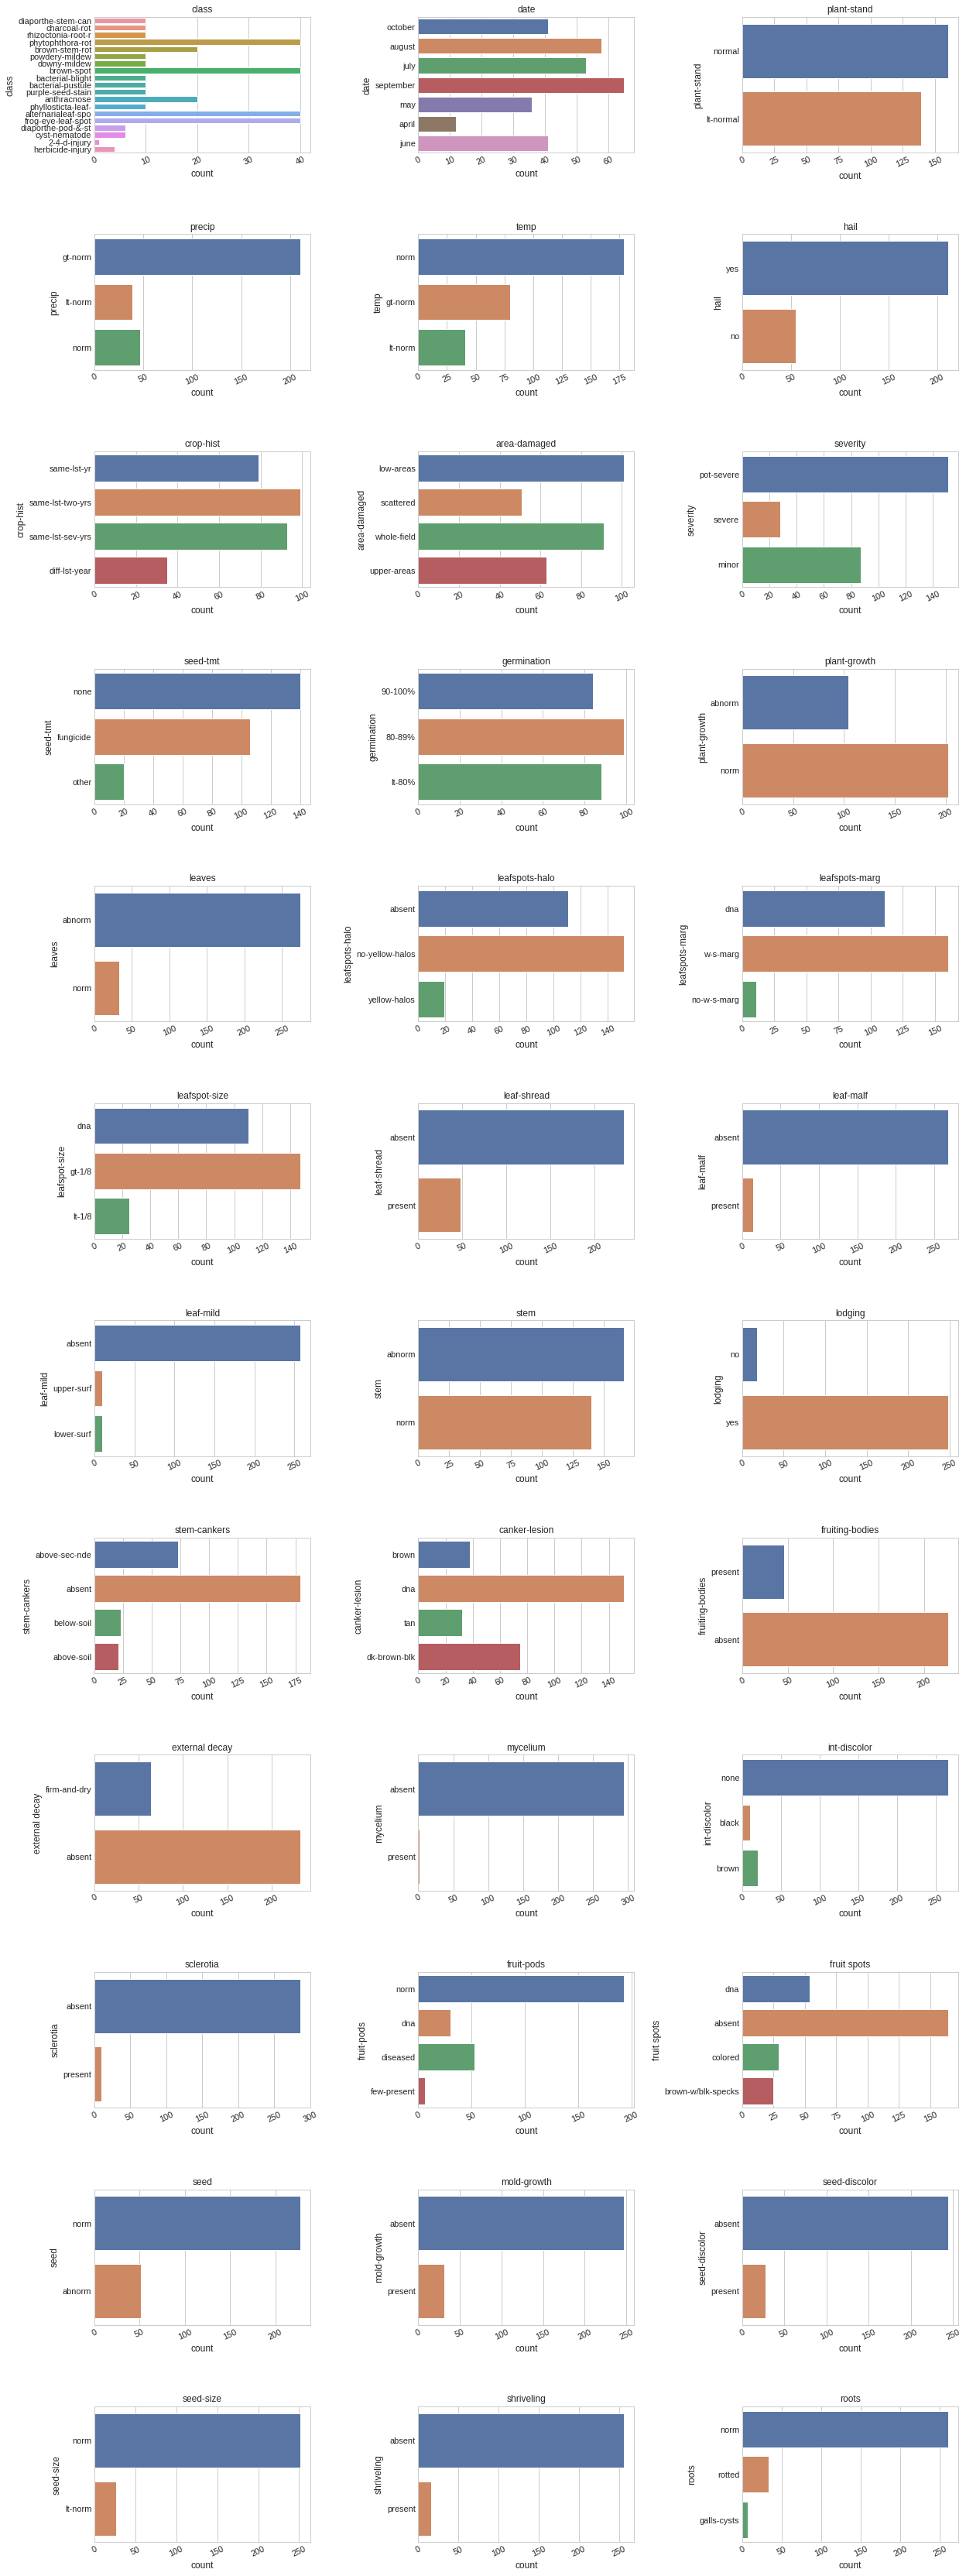

In [8]:
plot_distribution(df, cols=3, width=20, height=60, hspace=0.6, wspace=0.5)

**Mold growth and seed discolor are redundant features.**

**Plant stand and stem seem to be redundant features.**

**Leave shred and seed also seem to be redundant features.**

### Question 2

In [9]:
# Display the missing values
sum_of_null = df.isna().sum()
sorted_null = np.argsort(sum_of_null)
df.isna().sum()[sorted_null]

class               0
leaves              0
date                1
stem                1
plant-growth        1
area-damaged        1
crop-hist           1
roots               7
temp                7
plant-stand         8
stem-cankers       11
sclerotia          11
precip             11
int-discolor       11
mycelium           11
external decay     11
canker-lesion      11
fruit-pods         25
leaf-malf          25
leafspot-size      25
leafspots-marg     25
leafspots-halo     25
leaf-shread        26
seed-size          29
mold-growth        29
seed               29
leaf-mild          30
shriveling         35
seed-discolor      35
fruiting-bodies    35
fruit spots        35
germination        36
hail               41
lodging            41
seed-tmt           41
severity           41
dtype: int64

**hail, severity, seed-tmt and lodging are the feautures with the most missing values**

In [10]:
null_data = df[df.isnull().any(axis=1)]

In [11]:
null_data

,class,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,...,int-discolor,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
31,phytophthora-rot,may,lt-normal,gt-norm,norm,None,same-lst-sev-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
32,phytophthora-rot,june,lt-normal,gt-norm,gt-norm,None,same-lst-two-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
34,phytophthora-rot,june,lt-normal,gt-norm,gt-norm,None,same-lst-two-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
35,phytophthora-rot,july,lt-normal,gt-norm,norm,None,same-lst-two-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
38,phytophthora-rot,june,lt-normal,norm,norm,None,diff-lst-year,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
40,phytophthora-rot,june,lt-normal,gt-norm,norm,None,same-lst-yr,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
41,phytophthora-rot,may,lt-normal,gt-norm,norm,None,same-lst-yr,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
45,phytophthora-rot,june,lt-normal,gt-norm,gt-norm,None,same-lst-sev-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
47,phytophthora-rot,june,lt-normal,norm,gt-norm,None,same-lst-two-yrs,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted
51,phytophthora-rot,may,lt-normal,gt-norm,norm,None,diff-lst-year,low-areas,None,None,...,none,absent,None,None,None,None,None,None,None,rotted


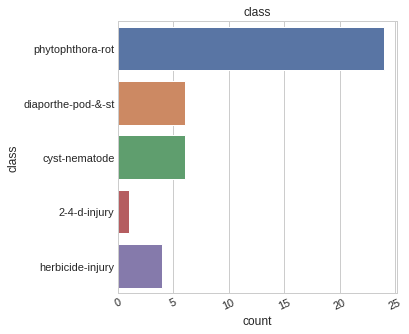

In [12]:
plot_distribution(null_data[['class']], cols=3, width=20, height=5, hspace=0.5, wspace=0.5)

**The class phytophthora has the most missing values**

### Question 3

In [13]:
null_classes = np.unique(null_data[['class']])
print(f'Original number of  data points for the classes with missing values\n {df.loc[df["class"].isin(null_classes)]["class"].value_counts()}')

Original number of  data points for the classes with missing values
 phytophthora-rot               40
diaporthe-pod-&-stem-blight     6
cyst-nematode                   6
herbicide-injury                4
2-4-d-injury                    1
Name: class, dtype: int64


In [14]:
perc_null = np.round(null_data.isnull().sum(axis = 1)/len(null_data.columns),decimals=2)*100
null_counts = pd.concat([null_data['class'],null_data.isnull().sum(axis = 1),perc_null],ignore_index=True,axis=1)
null_counts.columns =['class','No. of features N/A','Percent of features N/A']
null_counts

,class,No. of features N/A,Percent of features N/A
31,phytophthora-rot,13,36.0
32,phytophthora-rot,19,53.0
34,phytophthora-rot,19,53.0
35,phytophthora-rot,19,53.0
38,phytophthora-rot,13,36.0
40,phytophthora-rot,13,36.0
41,phytophthora-rot,19,53.0
45,phytophthora-rot,19,53.0
47,phytophthora-rot,13,36.0
51,phytophthora-rot,13,36.0


In [15]:
# How much data would we lose?
df.shape

(307, 36)

**Since it is meantioned that the classes cyst-nematode, 2-4-d-injury, herbicide-injury are unjustified by the data and also have more than 50% of their features having missing values we can remove the data points from the dataset.**

In [16]:
# Find index of rows to be dropped
cols_to_drop = ['cyst-nematode', '2-4-d-injury', 'herbicide-injury']
indices_to_drop = df[df['class'].isin(cols_to_drop) ].index

# How much data would we lose?
print(f'We are removing {len(df[df["class"].isin(cols_to_drop) ])} data points from the data set')

# Percentage of data lost
print( f'{np.round(len(df[df["class"].isin(cols_to_drop) ])/df.shape[0],2)*100}% is close to the recommended 3%' )

# Drop rows
df = df.drop(indices_to_drop)

We are removing 11 data points from the data set
4.0% is close to the recommended 3%


**Elimination of phytophthora-rot would be eliminating about 50% of the data points for the case of phytophthora-rot.**